<a href="https://colab.research.google.com/github/piyu18/KNN/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Exploratory Data Analysis(EDA)

In [3]:
df.shape

(768, 9)

As we can see that there are 768 rows and 9 columns. First 8 columns are features while last column is the target column

In [4]:
# Get the data types of each columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From the info we can see that there is no null values present in the dataset

In [6]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import plotly.express as px
# plotting the violin chart
fig = px.bar(df, x="Age", y="Outcome")
fig.show()

#### Declaration of feature vector and target variable

In [8]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

#### Split data into training and test dataset
Some classification problems do not have a balanced number of examples for each class label.So it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset. 
It can be achieved by setting stratify = y

In [9]:
# split X and Y into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21,stratify=y)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

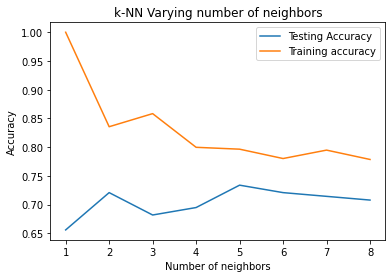

In [11]:
import matplotlib.pyplot as plt
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


From the graph we can see that we are getting max testing accuracy with k = 5. Lets create KNN with k=5.
By default we are using Minkowski metric and default value of p is 2, so basically we are using Euclidean metric

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
knn.score(X_test,y_test)

0.7337662337662337

In [15]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [16]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[88, 12],
       [29, 25]])

In [17]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
a.tail()

,Actual value,Predicted value
149,0,0
150,1,1
151,0,0
152,0,0
153,1,0
